Mean Squared Error on Drifted Data: 3.59
KS Statistic: 0.3700, P-Value: 0.0000


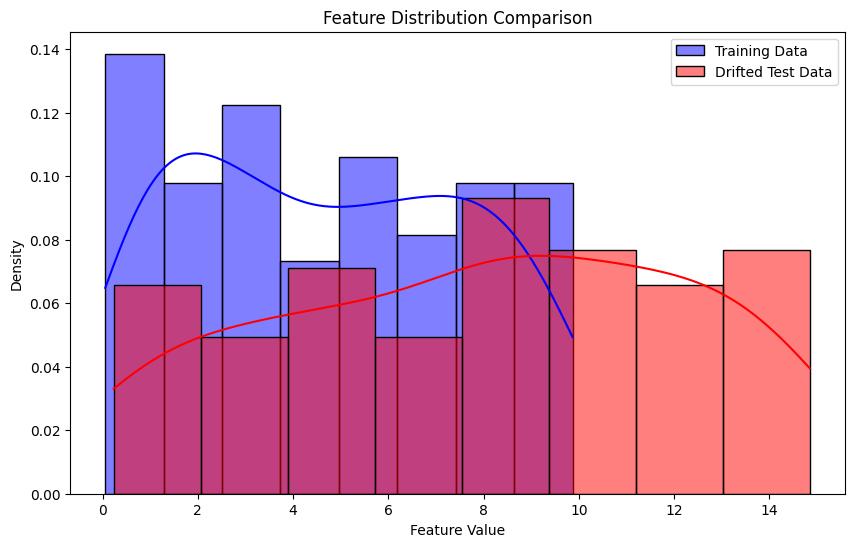

In [1]:
# Part 1: Detecting Data Drift in AI/ML Models
# Objective: Understand data drift, how it affects machine learning models, and techniques tomonitor it.

# Task 1: Understanding Data Drift: Study a historical dataset used in training a simple linear regression model and
# compare it with recent unseen data to detect drift.

# Task 2: Monitoring Distribution Changes: Write the code to identify features that exhibit statistical distribution differences.

# Task 3: Visualizing Data Drift: Use visualization techniques to illustrate data drift.


import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
np.random.seed(42)
X_train = np.random.rand(100, 1) * 10
y_train = 2.5 * X_train.squeeze() + np.random.randn(100) * 2
model = LinearRegression()
model.fit(X_train, y_train)
X_test_drifted = np.random.rand(100, 1) * 15  
y_test_drifted = 2.5 * X_test_drifted.squeeze() + np.random.randn(100) * 2
y_pred_drifted = model.predict(X_test_drifted)
mse_drifted = mean_squared_error(y_test_drifted, y_pred_drifted)
print(f"Mean Squared Error on Drifted Data: {mse_drifted:.2f}")
from scipy.stats import ks_2samp
ks_stat, ks_p_value = ks_2samp(X_train.squeeze(), X_test_drifted.squeeze())
print(f"KS Statistic: {ks_stat:.4f}, P-Value: {ks_p_value:.4f}")
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(X_train.squeeze(), color='blue', label='Training Data', kde=True, stat='density')
sns.histplot(X_test_drifted.squeeze(), color='red', label='Drifted Test Data', kde=True, stat='density')
plt.title('Feature Distribution Comparison')
plt.xlabel('Feature Value')
plt.ylabel('Density')
plt.legend()
plt.show()



In [2]:
# Part 2: Automating Data Quality Checks
# Objective: Use Python and data quality frameworks to automate validation.

# Task 1: Setting Up Automated Validation with Python

# Task 2: Introduction to Great Expectations: Install the great_expectations package and set up a basic project.

# Task 3: Creating Expectations with Great Expectations: Use Great Expectations to define data validation expectations for a dataset.

# Task 1: Setting Up Automated Validation with Python
# (This task is conceptual and depends on the specific validation needs and data sources)
# Example using basic Python for a simple check:

def validate_column_presence(df, column_name):
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' is missing.")
    return True

def validate_data_types(df, column_types):
    for col, expected_type in column_types.items():
        actual_type = df[col].dtype
        if actual_type != expected_type:
            raise TypeError(f"Column '{col}' has type '{actual_type}', expected '{expected_type}'.")
    return True

def run_data_validation(df):
    try:
        validate_column_presence(df, 'user_id')
        validate_column_presence(df, 'age')
        validate_data_types(df, {'user_id': 'int64', 'age': 'int64'})
        print("Basic data validation checks passed.")
        return True
    except (ValueError, TypeError) as e:
        print(f"Data validation failed: {e}")
        return False

import pandas as pd
data={'user_id':[1,2,3],'age':[25,30,'error']}
df=pd.DataFrame(data)
run_data_validation(df)

# Task 2: Introduction to Great Expectations: Install the great_expectations package and set up a basic project.
# (Installation is done in the terminal: pip install great_expectations)
# (Basic project setup is typically done via the command line: great_expectations init)
# (Assuming Great Expectations is installed and a project is initialized)

import great_expectations as gx

context=gx.get_context()
print(f"Great Expectations Data Context root directory: {context.root_directory}")

# Task 3: Creating Expectations with Great Expectations: Use Great Expectations to define data validation expectations for a dataset.

expectation_suite_name="my_sample_expectation_suite"
try:
    suite=context.get_expectation_suite(expectation_suite_name)
    print(f"Loaded existing Expectation Suite: {expectation_suite_name}")
except gx.exceptions.ExpectationSuiteNotFoundError:
    suite=context.create_expectation_suite(
        expectation_suite_name=expectation_suite_name,
        overwrite_existing=True
    )
    print(f"Created new Expectation Suite: {expectation_suite_name}")

data_gx={'user_id':[1,2,3,4,5],'age':[25,30,18,40,28],'signup_date':['2023-01-15','2023-02-20','2023-01-10','2023-03-01','2023-02-25']}
df_gx=pd.DataFrame(data_gx)

datasource_name="my_pandas_datasource"
datasource=context.add_pandas(name=datasource_name,dataframe=df_gx)
data_asset_name="sample_data"
data_asset=datasource.get_asset(data_asset_name)
batch_request=data_asset.build_batch_request()

suite.add_expectation(
    gx.expectations.expect_column_values_to_not_be_null(column="user_id")
)
suite.add_expectation(
    gx.expectations.expect_column_values_to_be_between(
        column="age",min_value=18,max_value=60
    )
)
suite.add_expectation(
    gx.expectations.expect_column_values_to_be_of_type(
        column="signup_date",type="datetime64[ns]"
    )
)

context.save_expectation_suite(suite)

validator=context.get_validator(
    batch_request=batch_request,
    expectation_suite_name=expectation_suite_name
)

validation_result=validator.validate()
print("\n---Great Expectations Validation Results---")
if validation_result["success"]:
    print("Data validation successful!All expectations met.")
else:
    print("Data validation failed.Unmet expectations:")
    for result in validation_result["results"]:
        if not result["success"]:
            print(f"-Column:{result['expectation_config']['kwargs'].get('column','N/A')},Expectation:{result['expectation_config']['expectation_type']}")


Data validation failed: Column 'age' has type 'object', expected 'int64'.
Great Expectations Data Context root directory: None


AttributeError: 'EphemeralDataContext' object has no attribute 'get_expectation_suite'